In [ ]:
import pandas as pd
import seaborn as sns

from IPython.display import display

In [44]:
trainf = pd.read_csv('./data/train_logs.csv')
testf = pd.read_csv('./data/train_scores.csv')

In [53]:
trainf['id'] = trainf['id'].astype(str)
testf['id'] = testf['id'].astype(str)

In [24]:
display(trainf.head())
display(trainf.describe(include='all'))

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1


,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
count,8405898,8.405898e+06,8.405898e+06,8.405898e+06,8.405898e+06,8405898,8405898,8405898,8405898,8.405898e+06,8.405898e+06
unique,2471,NaN,NaN,NaN,NaN,50,131,130,4111,NaN,NaN
top,d3fef198,NaN,NaN,NaN,NaN,Input,q,q,q,NaN,NaN
freq,12876,NaN,NaN,NaN,NaN,6726796,5365319,5364789,6128208,NaN,NaN
mean,NaN,2.067649e+03,7.935603e+05,7.936584e+05,9.808498e+01,NaN,NaN,NaN,NaN,1.222964e+03,2.314687e+02
std,NaN,1.588284e+03,5.149451e+05,5.149428e+05,2.533985e+02,NaN,NaN,NaN,NaN,9.485242e+02,1.759088e+02
min,NaN,1.000000e+00,1.060000e+02,2.520000e+02,0.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
25%,NaN,8.520000e+02,3.731842e+05,3.732820e+05,6.600000e+01,NaN,NaN,NaN,NaN,4.990000e+02,9.600000e+01
50%,NaN,1.726000e+03,7.208860e+05,7.209800e+05,9.300000e+01,NaN,NaN,NaN,NaN,1.043000e+03,2.000000e+02
75%,NaN,2.926000e+03,1.163042e+06,1.163141e+06,1.220000e+02,NaN,NaN,NaN,NaN,1.706000e+03,3.270000e+02


,id,score
0,001519c8,3.5
1,0022f953,3.5
2,0042269b,6.0
3,0059420b,2.0
4,0075873a,4.0


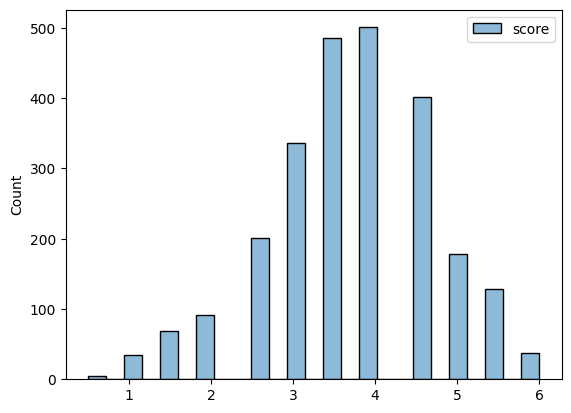

In [25]:
sns.histplot(testf)
display(testf.head())

In [60]:
last_eventsf = trainf.loc[trainf.groupby('id')['event_id'].idxmax()]
last_eventsf = pd.merge(last_eventsf, testf, on = 'id')
sns.pairplot(last_eventsf)
